# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

#### First five records

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [4]:
dataframe['date'].dtype

dtype('O')

### Loading data with parse_dates

In [2]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

#### First five records

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [7]:
df2['date'].dtype

dtype('<M8[ns]')

#### Note
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

In [8]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#### First 5 records

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

#### Size

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

### Querying by time

In [12]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive Statistics

In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature


### Date time features

In [16]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [17]:
features = df2.copy()

In [18]:
features['year'] = df2['date'].dt.year

In [19]:
features['month'] = df2['date'].dt.month

In [20]:
features['day'] = df2['date'].dt.day

In [21]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features

To create lag1 feature

In [19]:
features['lag2'] =  df2['births'].shift(2)

In [23]:
features['lag2'] =  df2['births'].shift(365)

In [20]:
features.head(7)

,date,births,lag1,lag2
0,1959-01-01,35,NaN,NaN
1,1959-01-02,32,35.0,NaN
2,1959-01-03,30,32.0,35.0
3,1959-01-04,31,30.0,32.0
4,1959-01-05,44,31.0,30.0
5,1959-01-06,29,44.0,31.0
6,1959-01-07,45,29.0,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window features

In [25]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [26]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [27]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()

In [28]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding features

In [29]:
features['Expand_max'] = df2['births'].expanding().max()

In [30]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series - Data Visualization

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
Dataviz_df = df2.copy()

In [33]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


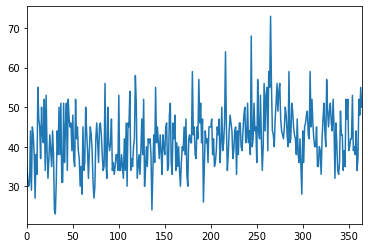

In [34]:
Dataviz_df['births'].plot()

In [35]:
Dataviz_df.index = Dataviz_df['date'] 

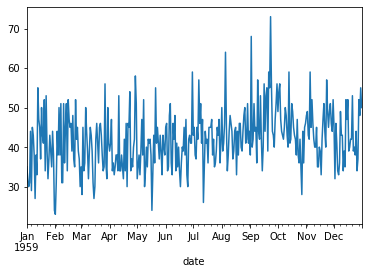

In [36]:
Dataviz_df['births'].plot()

### Zooming In

In [37]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [38]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


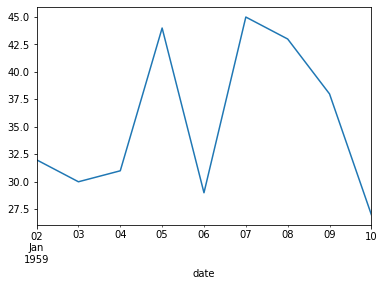

In [39]:
Dataviz_df2['births'].plot()

### Trendline

In [40]:
import seaborn as sns

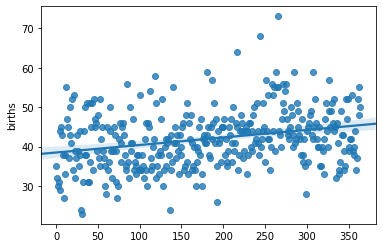

In [41]:
sns.regplot(x= df2.index.values, y=df2['births'])

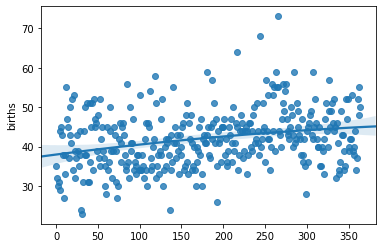

In [42]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

In [43]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [44]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


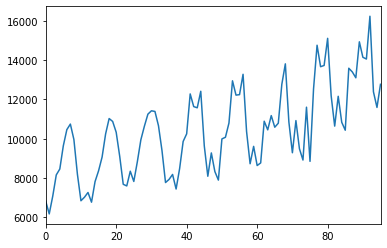

In [45]:
miles_df['MilesMM'].plot()

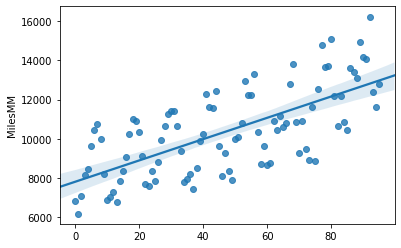

In [46]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

### Removing Seasonality

In [47]:
miles_df['year'] = miles_df['Month'].dt.year

In [48]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [49]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

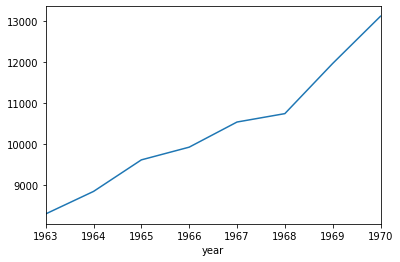

In [50]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [51]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [52]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


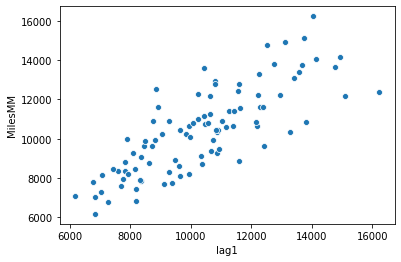

In [53]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [54]:
from pandas.plotting import lag_plot

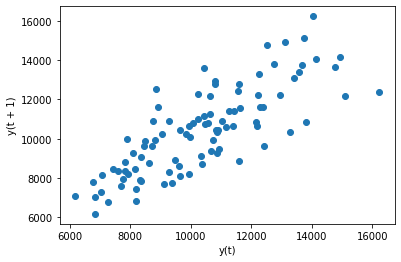

In [55]:
lag_plot(miles_df['MilesMM'])

### Autocorrelation Plots

In [56]:
from pandas.plotting import autocorrelation_plot

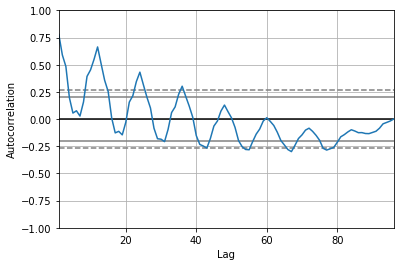

In [57]:
autocorrelation_plot(miles_df['MilesMM'])

## Downsampling and Upsampling

In [58]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [59]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [60]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [61]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [62]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [63]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

In [64]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [65]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [66]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [67]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [68]:
poly_interpolated_miles_df.head(35)

NameError: name 'poly_interpolated_miles_df' is not defined

In [ ]:
interpolated_miles_df.plot()

In [ ]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

In [ ]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [ ]:
miles_decomp_df.head()

In [ ]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [ ]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

In [ ]:
result.plot()

In [ ]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

In [ ]:
result2.plot()

### Differencing

In [ ]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [ ]:
miles_df.head()

In [ ]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [ ]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [ ]:
miles_df.head()

In [ ]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

In [ ]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

In [ ]:
miles_df['MilesMM'].plot()

In [ ]:
miles_df['MilesMM_diff_1'].plot() 

In [ ]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

In [ ]:
miles_df['MilesMM_diff_12'].plot() 

In [ ]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [ ]:
miles_df.head(50)

## Test-Train Split

In [372]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [373]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [374]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [375]:
temp_df.shape

(3650, 2)

In [376]:
temp_df.shape[0]

3650

In [377]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [378]:
train =  temp_df[0:train_size]

In [379]:
test =  temp_df[train_size:]

In [380]:
train.shape

(2920, 2)

In [381]:
test.shape

(730, 2)

### Walk Forward Validation

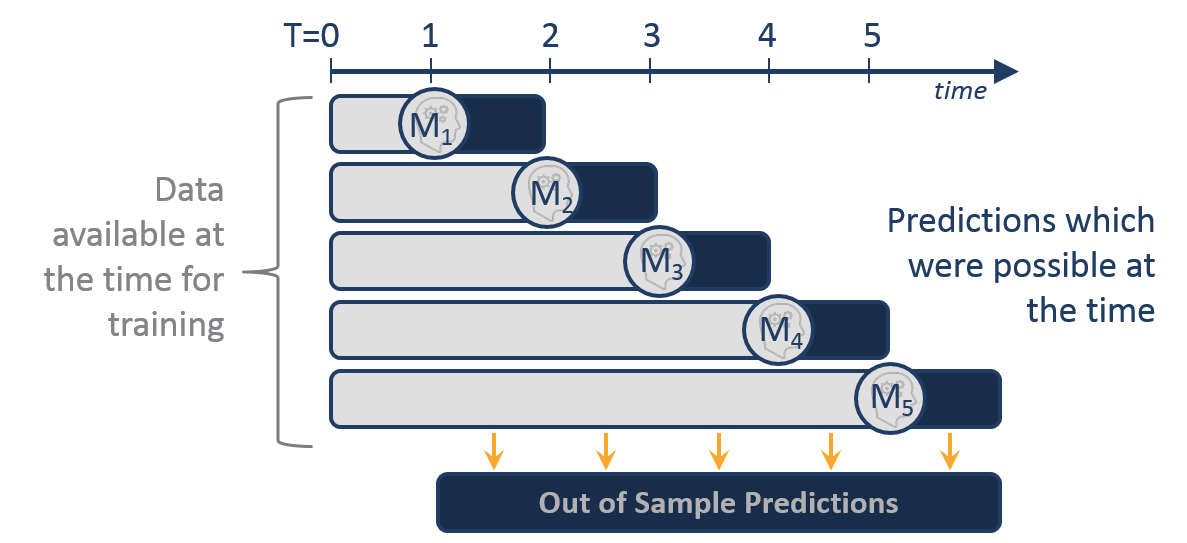

### Persistence Model

In [382]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [383]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [384]:
df['t'] =  df['Temp'].shift(1)

In [385]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [386]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [387]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [388]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### # walk-forward validation

In [389]:
predictions = test_X.copy()

In [390]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [391]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [392]:
from matplotlib import pyplot

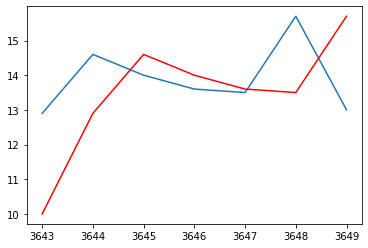

In [393]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [397]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [398]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [399]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [400]:
from statsmodels.tsa.ar_model import AR

In [401]:
model = AR(train)
model_fit = model.fit()

#### No. of lag Variables

In [402]:
model_fit.k_ar

29

#### Coef of lag variables

In [403]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [404]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [405]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [408]:
predictions.iloc[0]

11.871274847727832

In [409]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.501525231006988

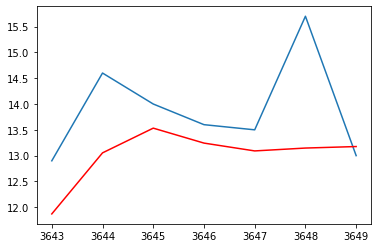

In [410]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [411]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [412]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [413]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

11.871274847727832
13.660699943835198
14.353164144090158
13.43012079162701
13.374756477185123
13.47911129942051
14.767773018439883


In [414]:
predict

[11.871274847727832,
 13.660699943835198,
 14.353164144090158,
 13.43012079162701,
 13.374756477185123,
 13.47911129942051,
 14.767773018439883]

In [415]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.452456842518536

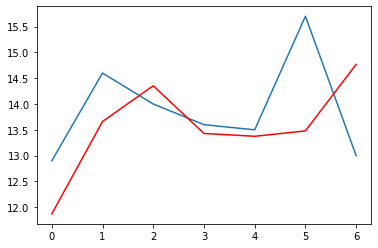

In [416]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Moving Average Model

In [417]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [418]:
df['t'] =  df['Temp'].shift(1)

In [419]:
df['Resid'] = df['Temp'] - df['t']

In [420]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [421]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [422]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [423]:
from statsmodels.tsa.ar_model import AR

In [424]:
model = AR(train)
model_fit = model.fit()

In [425]:
model_fit.k_ar

29

In [426]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [427]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [428]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [429]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [430]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [431]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [432]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648206

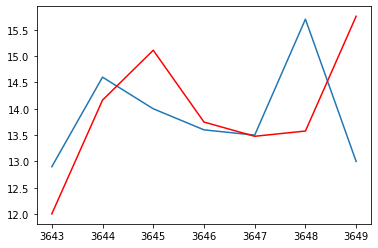

In [433]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## ARIMA Model

In [435]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [436]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


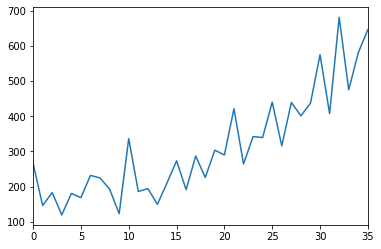

In [437]:
df['Sales'].plot()

Trend is Polynomial.  
D =2

### Autocorrelation Plot

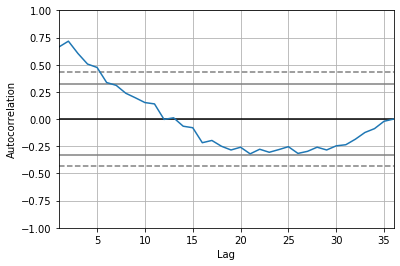

In [438]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

 q = 5 

### Partial Autocorrelation Graph

In [439]:
from statsmodels.graphics.tsaplots import plot_pacf

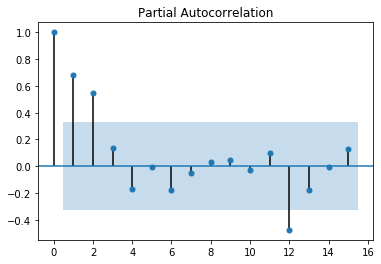

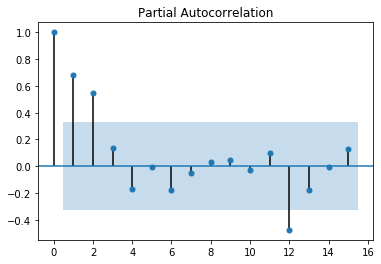

In [440]:
plot_pacf(df['Sales'], lags=15)

p = 2

In [441]:
from statsmodels.tsa.arima_model import ARIMA

In [442]:
model = ARIMA(df['Sales'], order=(5,2,2))

In [443]:
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [444]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.343
Date:                Tue, 03 Mar 2020   AIC                            396.067
Time:                        17:25:28   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.001       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1231      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6013      0.478     -3.353      0.002      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.018      -1.834      -0.229
ar.L5.D2.Sales    -0.3193      0.193     -1.653      0.110      -0.698       0.059
ma.L1.D2.Sales    -0.0002      0.120     -0.002      0.998      -0.235       0.234
ma.L2.D2.Sales    -0.9998      0.120     -8.363      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1409           -1.3030j            1.3106           -0.2329
AR.2            0.1409           +1.3030j            1.3106            0.2329
AR.3           -1.1313           -0.4225j            1.2076           -0.4431
AR.4           -1.1313           +0.4225j            1.2076            0.4431
AR.5           -1.2502           -0.0000j            1.2502           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0002           +0.0000j            1.0002            0.5000
-----------------------------------------------------------------------------
"""

In [445]:
residuals = model_fit.resid

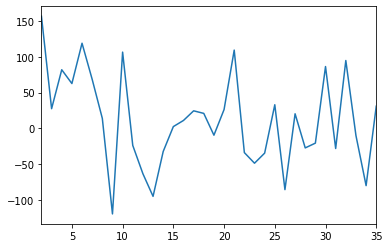

In [446]:
residuals.plot()

In [447]:
residuals.describe()

count     34.000000
mean      11.293855
std       65.989793
min     -119.295696
25%      -31.207155
50%       12.481503
75%       55.127849
max      156.383323
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [448]:
output = model_fit.forecast()

In [451]:
output

(array([636.15148334]),
 array([54.34286347]),
 array([[529.64142812, 742.66153855]]))

In [455]:
model_fit.forecast(5)[0]

array([636.15148334, 709.19180983, 664.3330911 , 771.11928552,
       761.60381712])

### Walk Forward ARIMA

In [456]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [457]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

In [458]:
train_size = int(df.shape[0]*0.7)

In [459]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [461]:
test.shape

(11,)

In [462]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

387.3764645395876
348.1541436834551
386.30880112815987
356.0820881964668
446.3794710820297
394.73728843470417
434.9154133760461
507.9234715144021
435.48276116299513
652.7439008036883
546.3434721834466


In [463]:
predict

[387.3764645395876,
 348.1541436834551,
 386.30880112815987,
 356.0820881964668,
 446.3794710820297,
 394.73728843470417,
 434.9154133760461,
 507.9234715144021,
 435.48276116299513,
 652.7439008036883,
 546.3434721834466]

In [464]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

8119.124448295092

## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [465]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [466]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [467]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [468]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [469]:
df.index = df['Month'] 

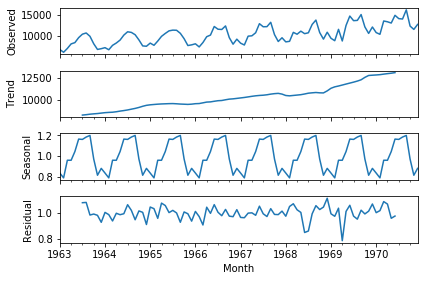

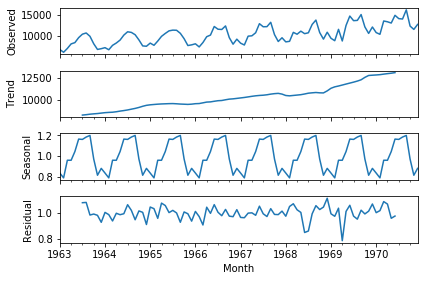

In [470]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [471]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [472]:
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [473]:
residuals = model_fit.resid

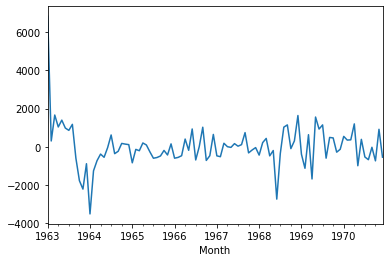

In [474]:
residuals.plot()

In [475]:
output = model_fit.forecast()

In [476]:
output

1971-01-01    11475.532536
Freq: MS, dtype: float64

In [477]:
model_fit.forecast(12)

1971-01-01    11475.532536
1971-02-01    11153.475571
1971-03-01    13669.193151
1971-04-01    12646.965728
1971-05-01    14338.968298
1971-06-01    15785.964758
1971-07-01    14978.849458
1971-08-01    15362.266461
1971-09-01    16962.519721
1971-10-01    13682.001475
1971-11-01    12426.693158
1971-12-01    13729.808264
Freq: MS, dtype: float64

In [478]:
yhat = model_fit.predict()

In [479]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.640800
1963-03-01    5421.493258
1963-04-01    7123.129686
1963-05-01    7066.719225
Freq: MS, dtype: float64

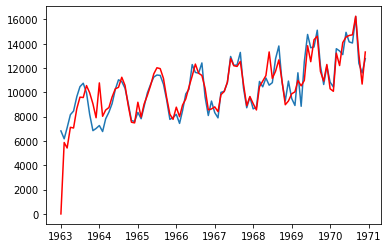

In [480]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')